Write an interactive linguistic essay - use Beautiful Soup to scrape text from a website and NLTK to carry out some basic linguistic analysis. Make sure that you're using as many features of the Notebook as possible, so advanced Markdown is welcome. I don't expect very advanced Python - it can be very basic, but I want you to learn how to use the Jupyter Notebook! Of course, it would be awesome if you could learn more NLTK and do some deeper research, visualizing the stats with matplotlib etc. Decide yourself how much effort you want to put into this - remember that it will be part of your portfolio!

The language you're using is also relevant, I will grade your English too ;)

# Analysing readability

*To obtain a meaningful job, you have to first consider these positions.* - that is the gist of 80000hours.org
However, with the website being advertised in many places, including reddit and youtube, it is inevitable that younger people, or people with reading skill below academic level **will** read it to try to find something for themselves.

For that reason, I will try to evaluate the readability of this website's main page.

In [1]:
import requests
page = requests.get("https://80000hours.org/problem-profiles/")
from bs4 import BeautifulSoup
soup = BeautifulSoup(page.content, 'html.parser')

#### First, we acquire the data using the requests and BeautifulSoup modules in Python

In [2]:
paras = soup.find_all('p')
only_text = []
for el in paras:
    if len(el.getText().strip()) > 0:
        only_text.append(el.getText())

#### Then, the text is split based on paragraphs...

In [23]:
import nltk
text_tokenized=[]
for sentence in only_text:
    text_tokenized.append(nltk.tokenize.word_tokenize(sentence))

#### ...and inserted into a list of lists.

In [24]:
text_pos=nltk.pos_tag(text_tokenized[15])

#### I processed one of the sencentes with a POS Tagger to generate its dependency tree in NLTK

In [25]:
grammar = "NP: {<DT>?<JJ>*<NN>}"
chunk_parser = nltk.RegexpParser(grammar)
tree = chunk_parser.parse(text_pos)

In [26]:
#tree.draw()
#only one sentence to not test this function's durability

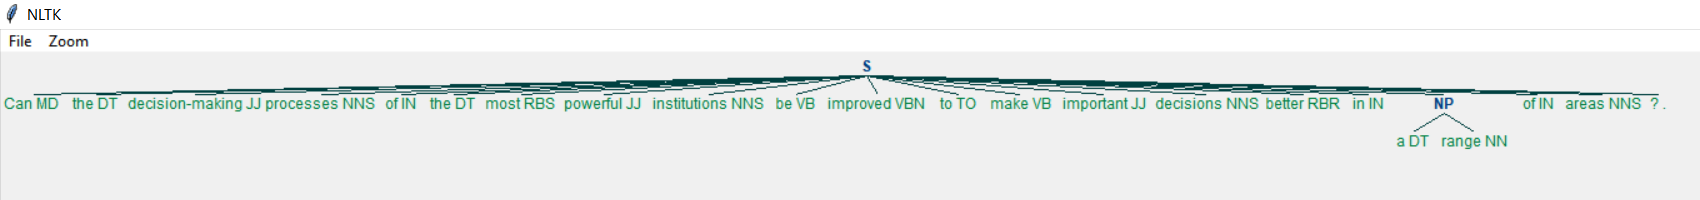

#### Resulting in a slightly unreadable tree due to the sentence's length.
## Now, to a proper analysis:

In [58]:
import readability
results = []
for sentence in text_tokenized:
    listToStr = ' '.join([str(elem) for elem in sentence])
    results.append(readability.getmeasures(listToStr, lang='en')['readability grades']['FleschReadingEase'])
results = [i for i in results if i > 0 and i <= 100]


#### Using python's readability module I extracted the values for the Flesch readability ease and then removed values from outside the range.

Flesch ease of readability scale for comparison:

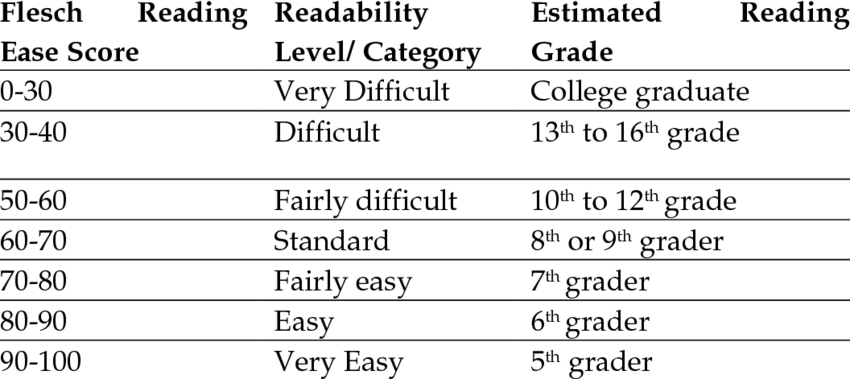

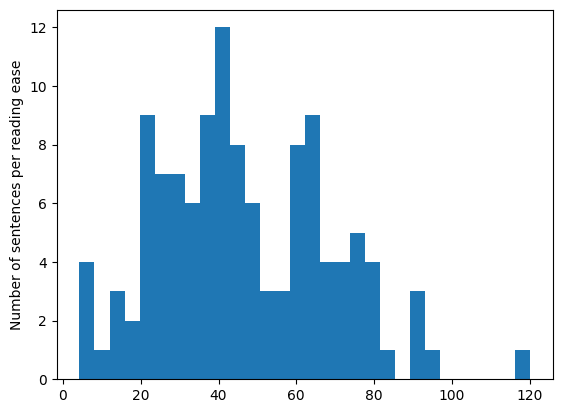

In [53]:
import matplotlib.pyplot as plt
plt.hist(results,bins=30)
plt.ylabel('Number of sentences per reading ease')
plt.show()

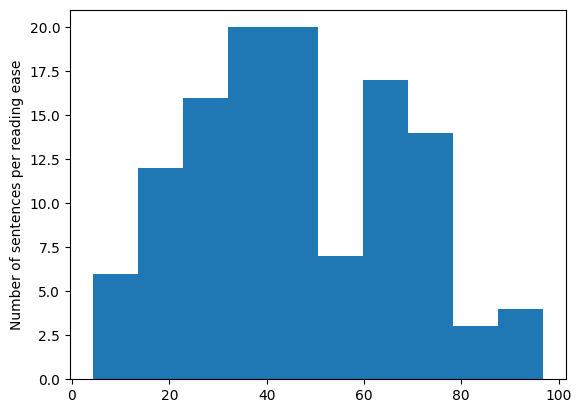

In [55]:
import matplotlib.pyplot as plt
plt.hist(results,bins=10)
plt.ylabel('Number of sentences per reading ease')
plt.show()

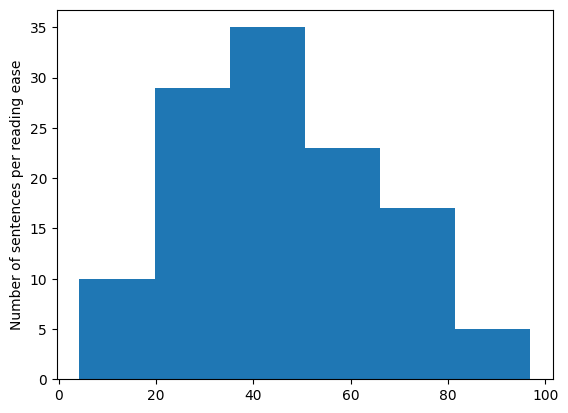

In [56]:
import matplotlib.pyplot as plt
plt.hist(results,bins=6)
plt.ylabel('Number of sentences per reading ease')
plt.show()

## Histograms with results, clearly showing that over a half of all the sentences are Fairly Difficult.
## Furthermore, 19 out of 119 sentenes are Difficult to read and 30 in 119 are Very difficult to read.

In [62]:
len(results)

119

In [64]:
difficult = [i for i in results if i > 30 and i <= 40]
len(difficult)

19

In [65]:
v_difficult = [i for i in results if i > 0 and i <= 30]
len(v_difficult)

30

## In Summary, the main website of https://80000hours.org/problem-profiles/ is not suitably readable for general audience.